In [21]:
import os
import numpy as np
import pandas as pd
from util import read_json_from,write_json_to
from data import proteomeHD_df,proteomeHD_simplified_protein_ids,proteomeHD_majority_protein_ids,proteomeHD_feature_matrix,major_simplified_idx_lookup
from data import pQTL_protein_df,pQTL_protein_ids,pQTL_protein_feature_matrix,pQTL_protein_idx_lookup
from validation import is_verifiable
PATH_ROOT = os.getcwd().replace("\\","/").replace("/notebooks","")

In [17]:
core_complexes = read_json_from(f"{PATH_ROOT}/data_sources/Corum/coreComplexes.json")
core_complexes

[{'PubMed ID': 11929873,
  'Protein complex purification method': 'MI:0007-anti tag coimmunoprecipitation',
  'Disease comment': None,
  'Subunits comment': None,
  'FunCat ID': '10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.02.01.01;70.10',
  'GO ID': 'GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO:0005634;GO:0016575',
  'Organism': 'Human',
  'ComplexName': 'BCL6-HDAC4 complex',
  'GO description': 'DNA topological change;negative regulation of transcription, DNA-templated;chromosome organization;B cell differentiation;nucleus;histone deacetylation',
  'ComplexID': 1,
  'subunits(UniProt IDs)': 'P41182;P56524',
  'Cell line': None,
  'subunits(Gene name syn)': 'BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288',
  'FunCat description': 'DNA conformation modification (e.g. chromatin);transcription repression;organization of chromosome structure;B-cell;nucleus',
  'subunits(Gene name)': 'BCL6;HDAC4',
  'subunits(Entrez IDs)': '604;9759',
  'Complex comment': 'Transcriptional repression by BCL6 is thought

In [36]:
import itertools
def tessa(source):
    result = []
    for p1 in range(len(source)):
            for p2 in range(p1+1,len(source)):
                    result.append([source[p1],source[p2]])
    return result

all_pQTL_pairs = tessa(pQTL_protein_ids)
print(len(all_pQTL_pairs))

9398280


In [41]:
corum_core_complex_pairs = read_json_from(f"{PATH_ROOT}/data_sources/Corum/all_corum_core_complex_pairs.json")
corum_core_complex_pairs

{'P41182': {'P56524': [1],
  'Q9UQL6': [2],
  'Q8WUI4': [3],
  'O94776': [41],
  'O95983': [41, 585],
  'Q13547': [41, 585],
  'Q9BTC8': [41, 585],
  'Q14839': [585]},
 'P56524': {'P41182': [1],
  'P27361': [55],
  'P28482': [57],
  'P59768': [1620],
  'P62873': [1620]},
 'Q9UQL6': {'P41182': [2], 'P59768': [1619], 'P62873': [1619]},
 'Q8WUI4': {'P41182': [3]},
 'Q09472': {'Q92793': [4, 570, 571, 2638],
  'Q92831': [4, 6653],
  'Q9Y6Q9': [4],
  'P04637': [98],
  'Q00987': [98],
  'O14497': [570, 571],
  'P51532': [570],
  'Q12824': [570],
  'Q8TAQ2': [570],
  'Q92922': [570],
  'Q9UK53': [1158, 1160],
  'P12004': [1160],
  'O43463': [1471, 5118],
  'Q08999': [1471, 5118],
  'Q13547': [1471, 5118],
  'Q15329': [1471, 5118],
  'P40763': [1521],
  'Q15797': [1521, 2642],
  'P84022': [1831],
  'Q9Y6X2': [1831],
  'P24928': [2638, 2639],
  'P50613': [2638, 2639],
  'Q06330': [2638, 2639],
  'Q7KZ85': [2638, 2639],
  'O60563': [2639],
  'P46531': [2639],
  'P49336': [2639, 7581, 7582],
  'P5

In [42]:
all_corum_verifiable_pQTL_pairs = []
for pair in all_pQTL_pairs:
    if is_verifiable(pair,corum_core_complex_pairs,len(pair)):
        all_corum_verifiable_pQTL_pairs.append(pair)
print(len(all_corum_verifiable_pQTL_pairs))

1413721


In [43]:
all_corum_verifiable_pQTL_pairs_df = pd.DataFrame(data=all_corum_verifiable_pQTL_pairs,columns=['protein_1','protein_2'])

In [44]:
all_corum_verifiable_pQTL_pairs_df

,protein_1,protein_2
0,O60762,P48506
1,O60762,O60341
2,O60762,Q96JG6
3,O60762,O14561
4,O60762,P30260
...,...,...
1413716,P63027,P63151
1413717,P63027,P62987
1413718,P63098,P63151
1413719,P63098,P62987


In [45]:
pQTL_subunit_1_col = all_corum_verifiable_pQTL_pairs_df['protein_1'].to_numpy()
pQTL_subunit_2_col = all_corum_verifiable_pQTL_pairs_df['protein_2'].to_numpy()
pQTL_pearson_corr_col = generate_pair_distances(pQTL_subunit_1_col,pQTL_subunit_2_col,
                                           pearson_corr_wrapper,
                                           pQTL_protein_feature_matrix,
                                           pQTL_protein_idx_lookup
                                          )
print('Pearson done')
pQTL_spearman_corr_col = generate_pair_distances(pQTL_subunit_1_col,pQTL_subunit_2_col,
                                           spearman_wrapper,
                                           pQTL_protein_feature_matrix,
                                           pQTL_protein_idx_lookup
                                          )
print('Spearman done')
pQTL_common_obs_col = generate_pair_distances(pQTL_subunit_1_col,pQTL_subunit_2_col,
                                           common_observation_wrapper,
                                           pQTL_protein_feature_matrix,
                                           pQTL_protein_idx_lookup
                                          )
all_corum_verifiable_pQTL_pairs_df['pearson'] = pQTL_pearson_corr_col
all_corum_verifiable_pQTL_pairs_df['spearman'] = pQTL_spearman_corr_col
all_corum_verifiable_pQTL_pairs_df['co_observed'] = pQTL_common_obs_col

Pearson done
Spearman done


In [50]:
all_corum_verifiable_pQTL_pairs_df['pearson'].describe()

count    1.413721e+06
mean     2.241865e-02
std      2.269925e-01
min     -8.206039e-01
25%     -1.329422e-01
50%      1.418243e-02
75%      1.679561e-01
max      9.926972e-01
Name: spearman, dtype: float64

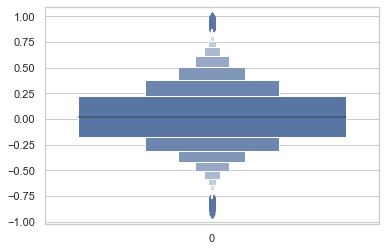

In [52]:
sns.boxenplot(data=[all_corum_verifiable_pQTL_pairs_df['pearson'].to_numpy()])

In [19]:
pQTL_verifiable_corum_complexes = []
for com in core_complexes:
    subunits = com['subunits(UniProt IDs)'].split(";")
    if is_verifiable(subunits,pQTL_protein_ids,len(subunits)):
        pQTL_verifiable_corum_complexes.append(com)
print(len(pQTL_verifiable_corum_complexes))

391


In [24]:
size_2_pQTL_verifiable_complexes_list = list(filter(lambda com: len(com['subunits(UniProt IDs)'].split(";"))==2,pQTL_verifiable_corum_complexes))

In [25]:
def construct_complex_df(complex_arr):
    col_names = ['ComplexID','ComplexName','subunit_1','subunit_2']
    com_data = []
    for com in complex_arr:
        subunits = com['subunits(UniProt IDs)'].split(";")
        cur_tuple = [com['ComplexID'],com['ComplexName'],subunits[0],subunits[1]]
        com_data.append(cur_tuple)
    to_return_df = pd.DataFrame(columns=col_names,data=com_data)
    return to_return_df

In [26]:
size_2_pQTL_verifiable_complexes_df = construct_complex_df(size_2_pQTL_verifiable_complexes_list)

In [29]:
size_2_pQTL_verifiable_complexes_df

,ComplexID,ComplexName,subunit_1,subunit_2
0,30,PA28 complex,Q06323,Q9UL46
1,152,TFIIE complex,P29083,P29084
2,153,TFIIF complex (transcription factor IIF),P13984,P35269
3,180,PNUTS-PP1 complex,P62136,Q96QC0
4,236,WICH complex,O60264,Q9UIG0
...,...,...,...,...
144,7384,DTX3L-PARP9 complex,Q8IXQ6,Q8TDB6
145,7410,CAPG-PRMT5 complex,O14744,P40121
146,7418,HK1-VDAC1 complex,P19367,P21796
147,7482,LAP1-TOR1A complex,O14656,Q5JTV8


In [30]:
pQTL_subunit_1_col = size_2_pQTL_verifiable_complexes_df['subunit_1'].to_numpy()
pQTL_subunit_2_col = size_2_pQTL_verifiable_complexes_df['subunit_2'].to_numpy()
pQTL_pearson_corr_col = generate_pair_distances(pQTL_subunit_1_col,pQTL_subunit_2_col,
                                           pearson_corr_wrapper,
                                           pQTL_protein_feature_matrix,
                                           pQTL_protein_idx_lookup
                                          )
pQTL_spearman_corr_col = generate_pair_distances(pQTL_subunit_1_col,pQTL_subunit_2_col,
                                           spearman_wrapper,
                                           pQTL_protein_feature_matrix,
                                           pQTL_protein_idx_lookup
                                          )
pQTL_common_obs_col = generate_pair_distances(pQTL_subunit_1_col,pQTL_subunit_2_col,
                                           common_observation_wrapper,
                                           pQTL_protein_feature_matrix,
                                           pQTL_protein_idx_lookup
                                          )
size_2_pQTL_verifiable_complexes_df['pearson'] = pQTL_pearson_corr_col
size_2_pQTL_verifiable_complexes_df['spearman'] = pQTL_spearman_corr_col
size_2_pQTL_verifiable_complexes_df['co_observed'] = pQTL_common_obs_col

In [31]:
size_2_pQTL_verifiable_complexes_df

,ComplexID,ComplexName,subunit_1,subunit_2,pearson,spearman,co_observed
0,30,PA28 complex,Q06323,Q9UL46,0.746332,0.722545,62
1,152,TFIIE complex,P29083,P29084,0.426126,0.395208,43
2,153,TFIIF complex (transcription factor IIF),P13984,P35269,0.413365,0.214834,56
3,180,PNUTS-PP1 complex,P62136,Q96QC0,0.177332,0.001889,62
4,236,WICH complex,O60264,Q9UIG0,0.926121,0.865780,62
...,...,...,...,...,...,...,...
144,7384,DTX3L-PARP9 complex,Q8IXQ6,Q8TDB6,0.695985,0.741167,59
145,7410,CAPG-PRMT5 complex,O14744,P40121,-0.039355,0.020121,60
146,7418,HK1-VDAC1 complex,P19367,P21796,0.506652,0.488051,62
147,7482,LAP1-TOR1A complex,O14656,Q5JTV8,-0.080835,-0.059404,62


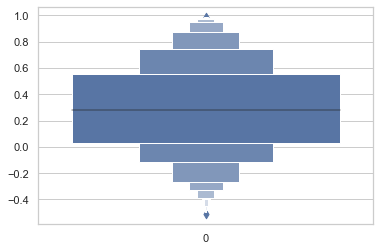

In [32]:
sns.set(style="whitegrid")
sns.boxenplot(data=[pQTL_pearson_corr_col])

In [8]:
size_2_verifiable_complexes_df = pd.read_csv(f"{PATH_ROOT}/data_sources/Corum/proteomeHD_verifiable_size_2_complexes_df.csv")
size_2_verifiable_complexes_df

,ComplexID,ComplexName,subunit_1,subunit_2
0,13,MUS81-CDS1 complex,Q92903,Q96NY9
1,30,PA28 complex,Q06323,Q9UL46
2,55,HDAC4-ERK1 complex,P27361,P56524
3,57,HDAC4-ERK2 complex,P28482,P56524
4,92,CD28-transactivation complex,P10747,P19338
...,...,...,...,...
489,7574,APP-PSEN1 complex,P05067,P49768
490,7579,APP(AICD)-MED12 complex,P05067,Q93074
491,7586,FOXO1-ESR1 complex,P03372,Q12778
492,7587,APP(AICD)-FOXO3 complex,O43524,P05067


In [4]:
from util import generate_pair_distances,find_common_observations
from scipy import stats

def pearson_corr(vec1,vec2):
    return stats.pearsonr(vec1,vec2)[0]

def pearson_corr_wrapper(p1_vec,p2_vec):
    vec1,vec2 = find_common_observations(p1_vec,p2_vec)
    if len(vec1) < 2: return float('NaN')
    return pearson_corr(vec1,vec2)

def common_observation_wrapper(p1_vec,p2_vec):
    vec1,_ = find_common_observations(p1_vec,p2_vec)
    return len(vec1)

def spearman_corr(vec1,vec2):
    return stats.spearmanr(vec1,vec2)[0]

def spearman_wrapper(p1_vec,p2_vec):
    vec1,vec2 = find_common_observations(p1_vec,p2_vec)
    if len(vec1) < 3: return float('NaN')
    return spearman_corr(p1_vec,p2_vec)

In [9]:
subunit_1_col = size_2_verifiable_complexes_df['subunit_1'].to_numpy()
subunit_2_col = size_2_verifiable_complexes_df['subunit_2'].to_numpy()
pearson_corr_col = generate_pair_distances(subunit_1_col,subunit_2_col,
                                           pearson_corr_wrapper,
                                           proteomeHD_feature_matrix,
                                           major_simplified_idx_lookup
                                          )
spearman_corr_col = generate_pair_distances(subunit_1_col,subunit_2_col,
                                           spearman_wrapper,
                                           proteomeHD_feature_matrix,
                                           major_simplified_idx_lookup
                                          )
common_obs_col = generate_pair_distances(subunit_1_col,subunit_2_col,
                                           common_observation_wrapper,
                                           proteomeHD_feature_matrix,
                                           major_simplified_idx_lookup
                                          )
size_2_verifiable_complexes_df['pearson'] = pearson_corr_col
size_2_verifiable_complexes_df['spearman'] = spearman_corr_col
size_2_verifiable_complexes_df['co_observed'] = common_obs_col

In [10]:
size_2_verifiable_complexes_df.describe()

,ComplexID,pearson,spearman,co_observed
count,494.000000,471.000000,463.000000,494.000000
mean,4299.299595,0.200703,0.142136,83.809717
std,2503.434024,0.406425,0.218775,78.239116
min,13.000000,-1.000000,-0.392057,0.000000
25%,2351.000000,-0.049265,-0.005540,17.000000
50%,5300.000000,0.224605,0.097765,60.000000
75%,6588.250000,0.512927,0.258078,133.750000
max,7588.000000,1.000000,0.891518,294.000000


In [12]:
size_2_verifiable_complexes_df

,ComplexID,ComplexName,subunit_1,subunit_2,pearson,spearman,co_observed
0,13,MUS81-CDS1 complex,Q92903,Q96NY9,NaN,NaN,0
1,30,PA28 complex,Q06323,Q9UL46,0.733164,0.618239,253
2,55,HDAC4-ERK1 complex,P27361,P56524,-0.049762,0.009951,39
3,57,HDAC4-ERK2 complex,P28482,P56524,-0.052761,0.041088,43
4,92,CD28-transactivation complex,P10747,P19338,0.131790,-0.011813,5
...,...,...,...,...,...,...,...
489,7574,APP-PSEN1 complex,P05067,P49768,0.321711,0.222057,48
490,7579,APP(AICD)-MED12 complex,P05067,Q93074,-0.355921,-0.184412,87
491,7586,FOXO1-ESR1 complex,P03372,Q12778,-1.000000,NaN,2
492,7587,APP(AICD)-FOXO3 complex,O43524,P05067,-0.326741,-0.054773,12


In [39]:
size_2_verifiable_complexes_df.to_csv(f"{PATH_ROOT}/data_sources/Corum/proteomeHD_verifiable_size_2_complexes_df_with_correlation.csv",index=False)

In [43]:
subunit_1_col_shuffled = np.random.permutation(size_2_verifiable_complexes_df['subunit_1'].to_numpy())
subunit_2_col_shuffled = np.random.permutation(size_2_verifiable_complexes_df['subunit_2'].to_numpy())
pearson_corr_col_shuffled = generate_pair_distances(subunit_1_col_shuffled,subunit_2_col_shuffled,
                                           pearson_corr_wrapper,
                                           proteomeHD_feature_matrix,
                                           major_simplified_idx_lookup
                                          )
spearman_corr_col_shuffled = generate_pair_distances(subunit_1_col_shuffled,subunit_2_col_shuffled,
                                           spearman_wrapper,
                                           proteomeHD_feature_matrix,
                                           major_simplified_idx_lookup
                                          )

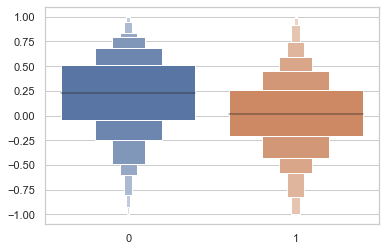

In [44]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxenplot(data=[pearson_corr_col,pearson_corr_col_shuffled])